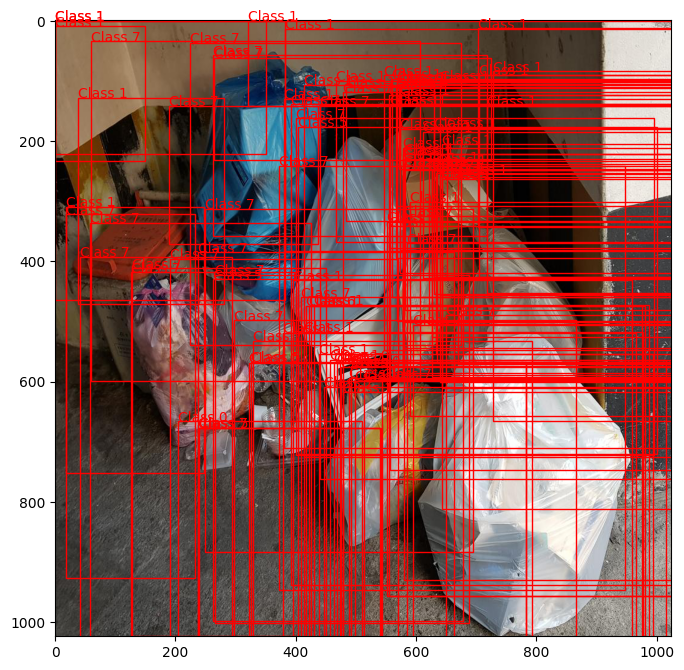

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from IPython.display import display

# CSV 파일 읽기
df = pd.read_csv('submission_latest_0.25.csv')

# 이미지 경로를 포함한 데이터 추출
image_data = df['image_id'].unique()

# 이미지와 bbox 시각화
for image_path in image_data:
    # 이미지 로드
    bbox_data = df[df['image_id'] == image_path]
    image_path = "/data/ephemeral/home/dataset/" + image_path
    img = Image.open(image_path)

    # 해당 이미지의 bbox 데이터 추출
    # bbox_data = df[df['image_id'] == image_path]

    # 시각화
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)

    for index, row in bbox_data.iterrows():
        # bbox 좌표 추출
        prediction_strings = row['PredictionString'].split()
        # x, y, w, h = map(float, row['PredictionString'].split()[2:6])

        # # bbox 시각화
        # rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        # ax.add_patch(rect)
        
        for i in range(0, len(prediction_strings), 6):
                class_id = int(prediction_strings[i])
                x, y, w, h = map(float, prediction_strings[i+2:i+6])

                # bbox 시각화
                rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

                # 클래스 표시
                ax.text(x, y, f'Class {class_id}', color='r')
                
    # 이미지 표시
    # clear_output(wait=True)
    display(fig)
    plt.close()
    break


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from IPython.display import display
import ipywidgets as widgets

# CSV 파일 읽기
df = pd.read_csv('submission_latest_0.25.csv')

# 이미지 경로를 포함한 데이터 추출
image_data = df['image_id'].unique()

def plot_image(image_path):
    # 이미지 로드
    bbox_data = df[df['image_id'] == image_path]
    image_path = "/data/ephemeral/home/dataset/" + image_path
    img = Image.open(image_path)

    # 시각화
    fig, ax = plt.subplots(1, figsize=(8, 8))
    ax.imshow(img)

    for index, row in bbox_data.iterrows():
        # bbox 좌표 추출
        prediction_strings = row['PredictionString'].split()
        for i in range(0, len(prediction_strings), 6):
            class_id = int(prediction_strings[i])
            x, y, w, h = map(float, prediction_strings[i+2:i+6])

            # bbox 시각화
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

            # 클래스 표시
            ax.text(x, y, f'Class {class_id}', color='r')

    plt.show()

# 드롭다운 위젯으로 고를 수 있게
image_dropdown = widgets.Dropdown(options=image_data, description='Image:')

# Plot 표시하도록
output_plot = widgets.Output()

# 위젯 display
display(image_dropdown)
display(output_plot)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        output_plot.clear_output(wait=True)
        with output_plot:
            plot_image(change['new'])

# 드롭다운 위젯에서 선택하는 것 바로바로 적용하도록
image_dropdown.observe(on_change)

# Initial plot
# plot_image(image_data[0])


Dropdown(description='Image:', options=('test/0000.jpg', 'test/0001.jpg', 'test/0002.jpg', 'test/0003.jpg', 't…

Output()